In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
dataset = pd.read_csv('Dataset.csv')

In [256]:
dataset.head()

,Time,Api,Suhu,Kelembaban,PPM,Label
0,1:33:59,0,26.9,72,50.14,Tidak Kebakaran
1,1:34:03,0,26.8,72,50.89,Tidak Kebakaran
2,1:34:06,0,26.9,72,49.77,Tidak Kebakaran
3,1:34:10,0,26.9,72,51.64,Tidak Kebakaran
4,1:34:14,0,26.8,72,54.34,Tidak Kebakaran


In [257]:
from sklearn.preprocessing import LabelEncoder

In [258]:
le=LabelEncoder()
dataset["Label"]=le.fit_transform(dataset[["Label"]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [259]:
dataset.head()

,Time,Api,Suhu,Kelembaban,PPM,Label
0,1:33:59,0,26.9,72,50.14,0
1,1:34:03,0,26.8,72,50.89,0
2,1:34:06,0,26.9,72,49.77,0
3,1:34:10,0,26.9,72,51.64,0
4,1:34:14,0,26.8,72,54.34,0


In [260]:
dataset = dataset.iloc[:,1:]
dataset.head()

,Api,Suhu,Kelembaban,PPM,Label
0,0,26.9,72,50.14,0
1,0,26.8,72,50.89,0
2,0,26.9,72,49.77,0
3,0,26.9,72,51.64,0
4,0,26.8,72,54.34,0


In [261]:
x=dataset.iloc[ : , :-1]
x.head()

,Api,Suhu,Kelembaban,PPM
0,0,26.9,72,50.14
1,0,26.8,72,50.89
2,0,26.9,72,49.77
3,0,26.9,72,51.64
4,0,26.8,72,54.34


In [262]:
y=dataset.iloc[ : ,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [263]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [264]:
print(xtrain)

     Api  Suhu  Kelembaban      PPM
117    1  39.4          65  3724.66
80     1  28.2          73   468.21
88     1  28.3          73   480.10
232    1  37.2          57   396.83
330    0  36.2          45   619.76
..   ...   ...         ...      ...
203    1  30.4          73   353.83
255    0  23.2          84     4.55
72     0  26.7          73    52.79
235    1  37.4          52   445.09
37     0  26.8          74    50.89

[259 rows x 4 columns]


In [265]:
print(xtest)

     Api  Suhu  Kelembaban      PPM
207    1  31.4          66   389.42
82     1  28.1          73   440.24
185    0  23.6          84    70.56
368    0  29.9          60   435.43
65     0  26.7          74    60.84
..   ...   ...         ...      ...
206    1  31.2          66   385.02
120    0  39.8          61  3295.13
367    0  30.1          60   435.43
249    1  36.9          58   651.39
258    0  23.2          84     5.76

[112 rows x 4 columns]


In [266]:
#Lebih cocok pakai ini, di bagi dulu ke xtrain dan xtest

from sklearn.preprocessing import   RobustScaler
normscaler =   RobustScaler()
xtrain = normscaler.fit_transform(xtrain)
xtest = normscaler.fit_transform(xtest)

In [267]:
print(xtrain)

[[ 1.          1.33333333 -0.34782609  8.15453473]
 [ 1.          0.14814815  0.          0.90331559]
 [ 1.          0.15873016  0.          0.92979136]
 ...
 [ 0.         -0.01058201  0.         -0.02171057]
 [ 1.          1.12169312 -0.91304348  0.85183371]
 [ 0.          0.          0.04347826 -0.02594135]]


In [268]:
print(xtest)

[[ 1.00000000e+00  3.26732673e-01 -2.91666667e-01  4.49913852e-03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  1.08429238e-01]
 [ 0.00000000e+00 -4.45544554e-01  4.58333333e-01 -6.47589638e-01]
 [ 0.00000000e+00  1.78217822e-01 -5.41666667e-01  9.85924854e-02]
 [ 0.00000000e+00 -1.38613861e-01  4.16666667e-02 -6.67467650e-01]
 [ 0.00000000e+00  1.17821782e+00 -5.83333333e-01  3.88770559e+00]
 [ 1.00000000e+00  5.54455446e-01 -2.91666667e-01  5.32131518e+00]
 [ 0.00000000e+00 -4.65346535e-01  5.00000000e-01 -7.50272249e-01]
 [ 0.00000000e+00 -4.55445545e-01  5.00000000e-01 -7.29453508e-01]
 [ 1.00000000e+00  3.36633663e-01 -2.91666667e-01  1.39753468e+00]
 [ 0.00000000e+00  1.18811881e+00 -5.00000000e-01  4.61057400e+00]
 [ 0.00000000e+00 -4.45544554e-01  5.00000000e-01 -6.61332461e-01]
 [ 0.00000000e+00 -4.45544554e-01  4.58333333e-01 -6.95341858e-01]
 [ 0.00000000e+00 -4.55445545e-01  5.00000000e-01 -7.42950924e-01]
 [ 0.00000000e+00 -1.28712871e-01 -4.16666667e-02 -6.94605635e

In [269]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [270]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [271]:
accuracy=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

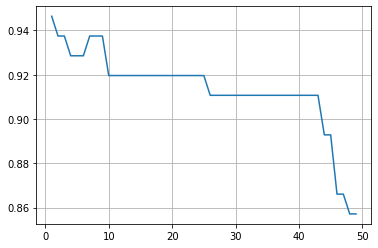

In [272]:
plt.plot(range(1,50),accuracy)
plt.grid(True)
plt.show()

In [273]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [274]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       1.00      0.88      0.94        58

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



In [275]:
confusion_matrix(ytest,ypred)

array([[54,  0],
       [ 7, 51]])

In [276]:
accuracy_score(ytest,ypred)

0.9375